# SENTIMENT ANALYSIS BASED RECOMMENDATION SYSTEM

In [ ]:
# Getting Started with importing libraries

# Dataframe and Series 
import pandas as pd
import numpy as np

# sklearn imports for modeling part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix

# For Plotting
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import nltk
from nltk.corpus import stopwords

import torch
from torchtext import data
from torchtext import datasets

In [5]:
import pandas as pd
# To see the hidden columns in dataframe
pd.options.display.max_columns=100 

# fetch and import csv dataset file - Kindle E-book Dataset
df = pd.read_csv("Kindle_Data.csv", low_memory=False)
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2.0,NaN


In [9]:
df.shape # to see numbers of columns and rows 

(1000, 12)

In [10]:
df.isna().sum() # to see null values

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
style             875
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
vote              938
image             999
dtype: int64

Here, Overall and ReviewText column is most important, so it must not have any null values in it. So, I have dropped all the clean values.

In [12]:
# overall column is checked for ratings
df["overall"].value_counts()

5.0    452
4.0    265
3.0    165
1.0     60
2.0     58
Name: overall, dtype: int64

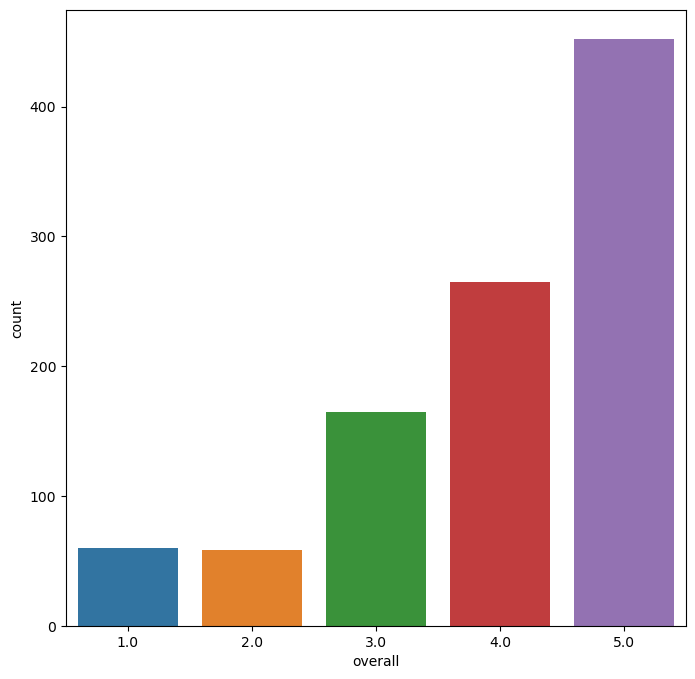

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
ax = sns.countplot(x='overall', data=df)

Mostly, ratings are consit of good reviews such as 4 and 5. 
It is seen that our target is imbalanced. 

In [16]:
# verified column check for True and False Value
df["verified"].value_counts()

True     590
False    410
Name: verified, dtype: int64

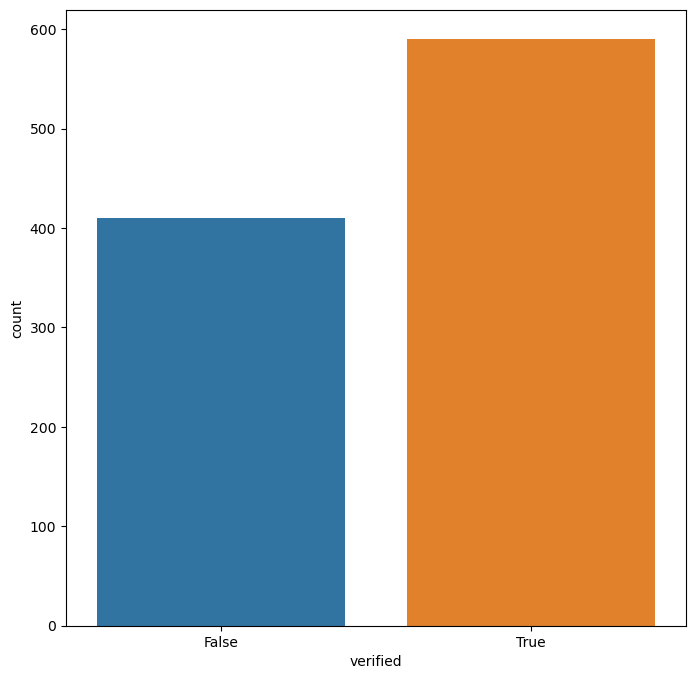

In [21]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='verified', data=df)

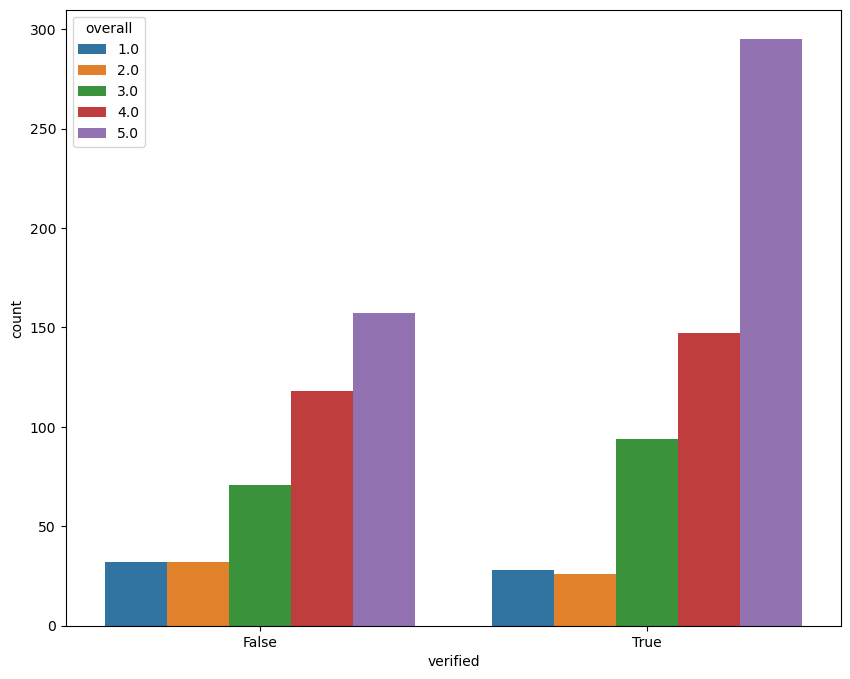

In [23]:
# combining above both the data
plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', hue='overall', data=df)

The distribution of ratings are nearly same in verfied and non-verified reviews.

In [24]:
df['reviewTime'].nunique()

826

Review time is daily-based in our data. So, it means that data is collected from 826 different days.

## Converting Data from String to DateTime to Divide Day, Month and Years.

In [25]:
# convert to date-time
df["reviewTime"] = pd.to_datetime(df['reviewTime'])

In [26]:
# to convert reviewTime column in day, month and year
df['day'] = df['reviewTime'].dt.day
df['month'] = df['reviewTime'].dt.month
df['year'] = df['reviewTime'].dt.year

## Looking to Years

In [28]:
df['year'].value_counts()

2014    169
2015    148
2013    138
2016    116
2017     77
2012     63
2009     43
2008     35
2011     35
2005     27
2010     26
2003     24
2007     24
2006     22
2004     18
2001     12
2002     10
2018      8
2000      4
1999      1
Name: year, dtype: int64

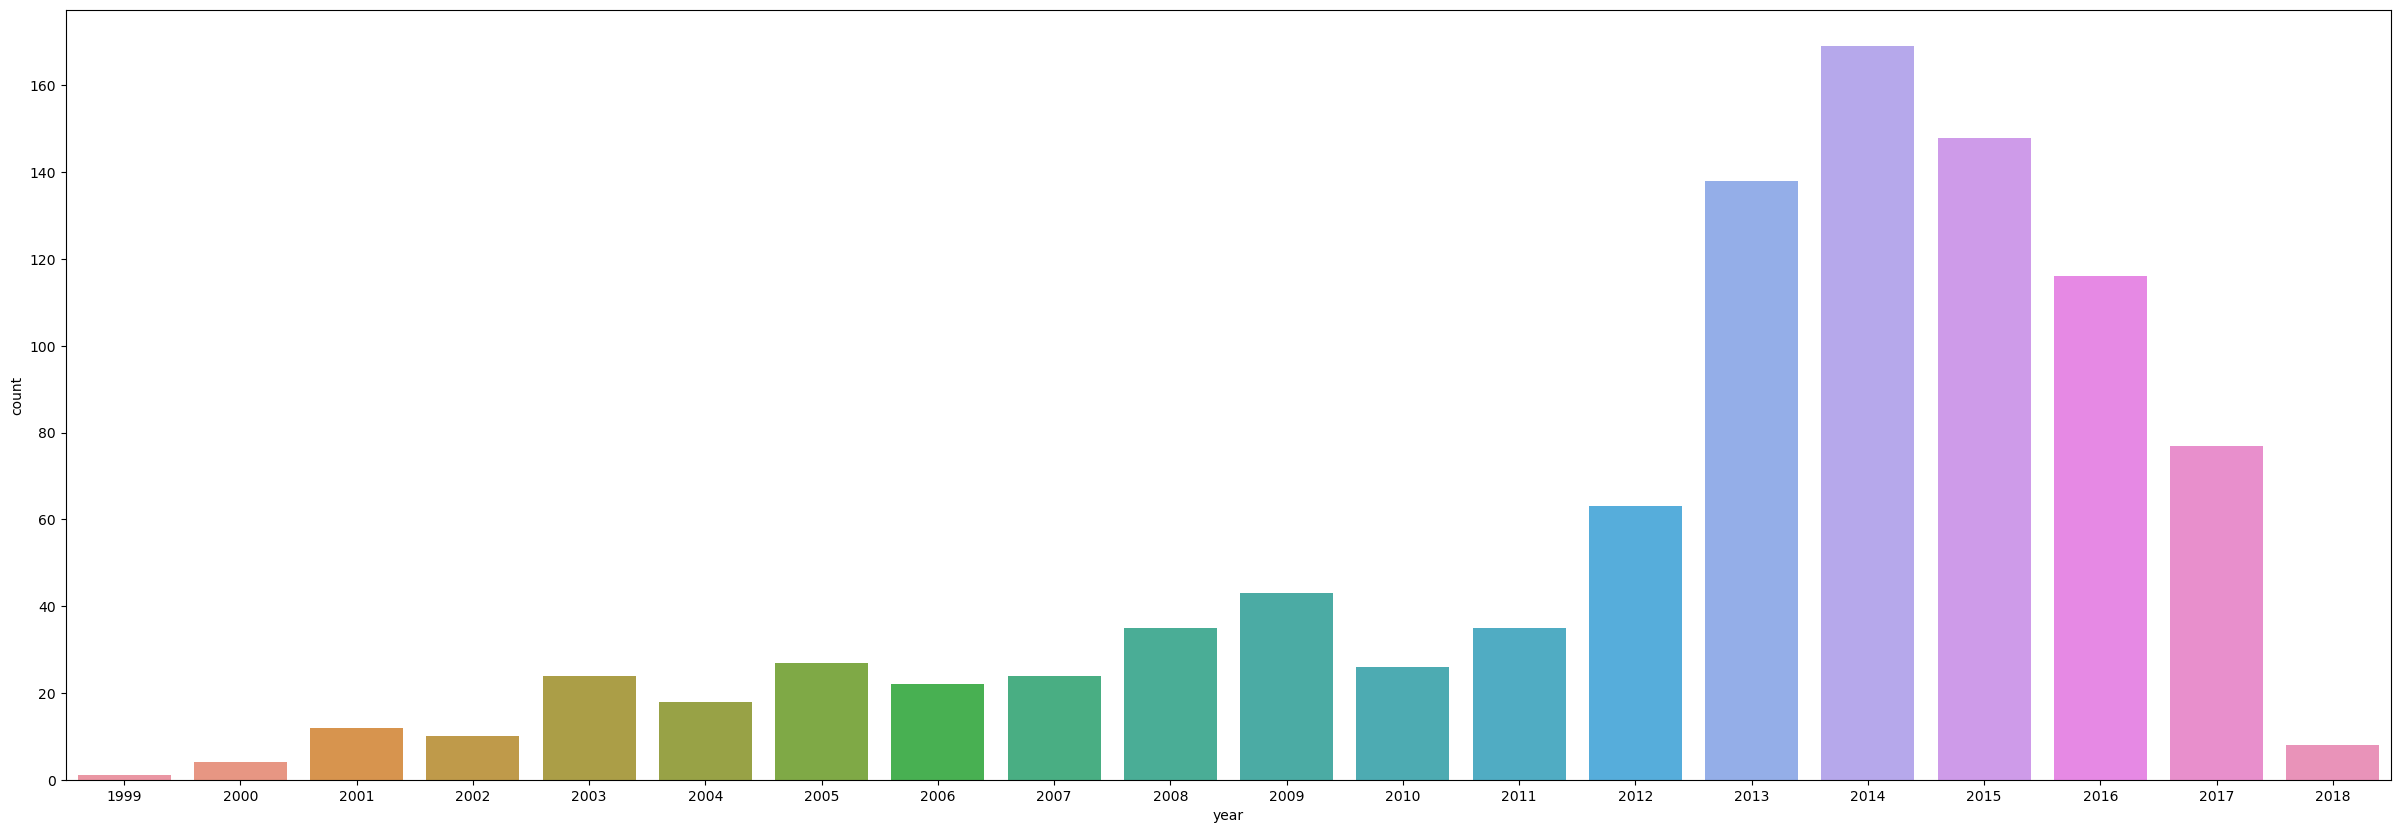

In [29]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='year', data=df)

Data consists of 20 years. From the graph, it is obviously seen that mostly data is obtained from recent years. It helps us to build more accurate model for future.

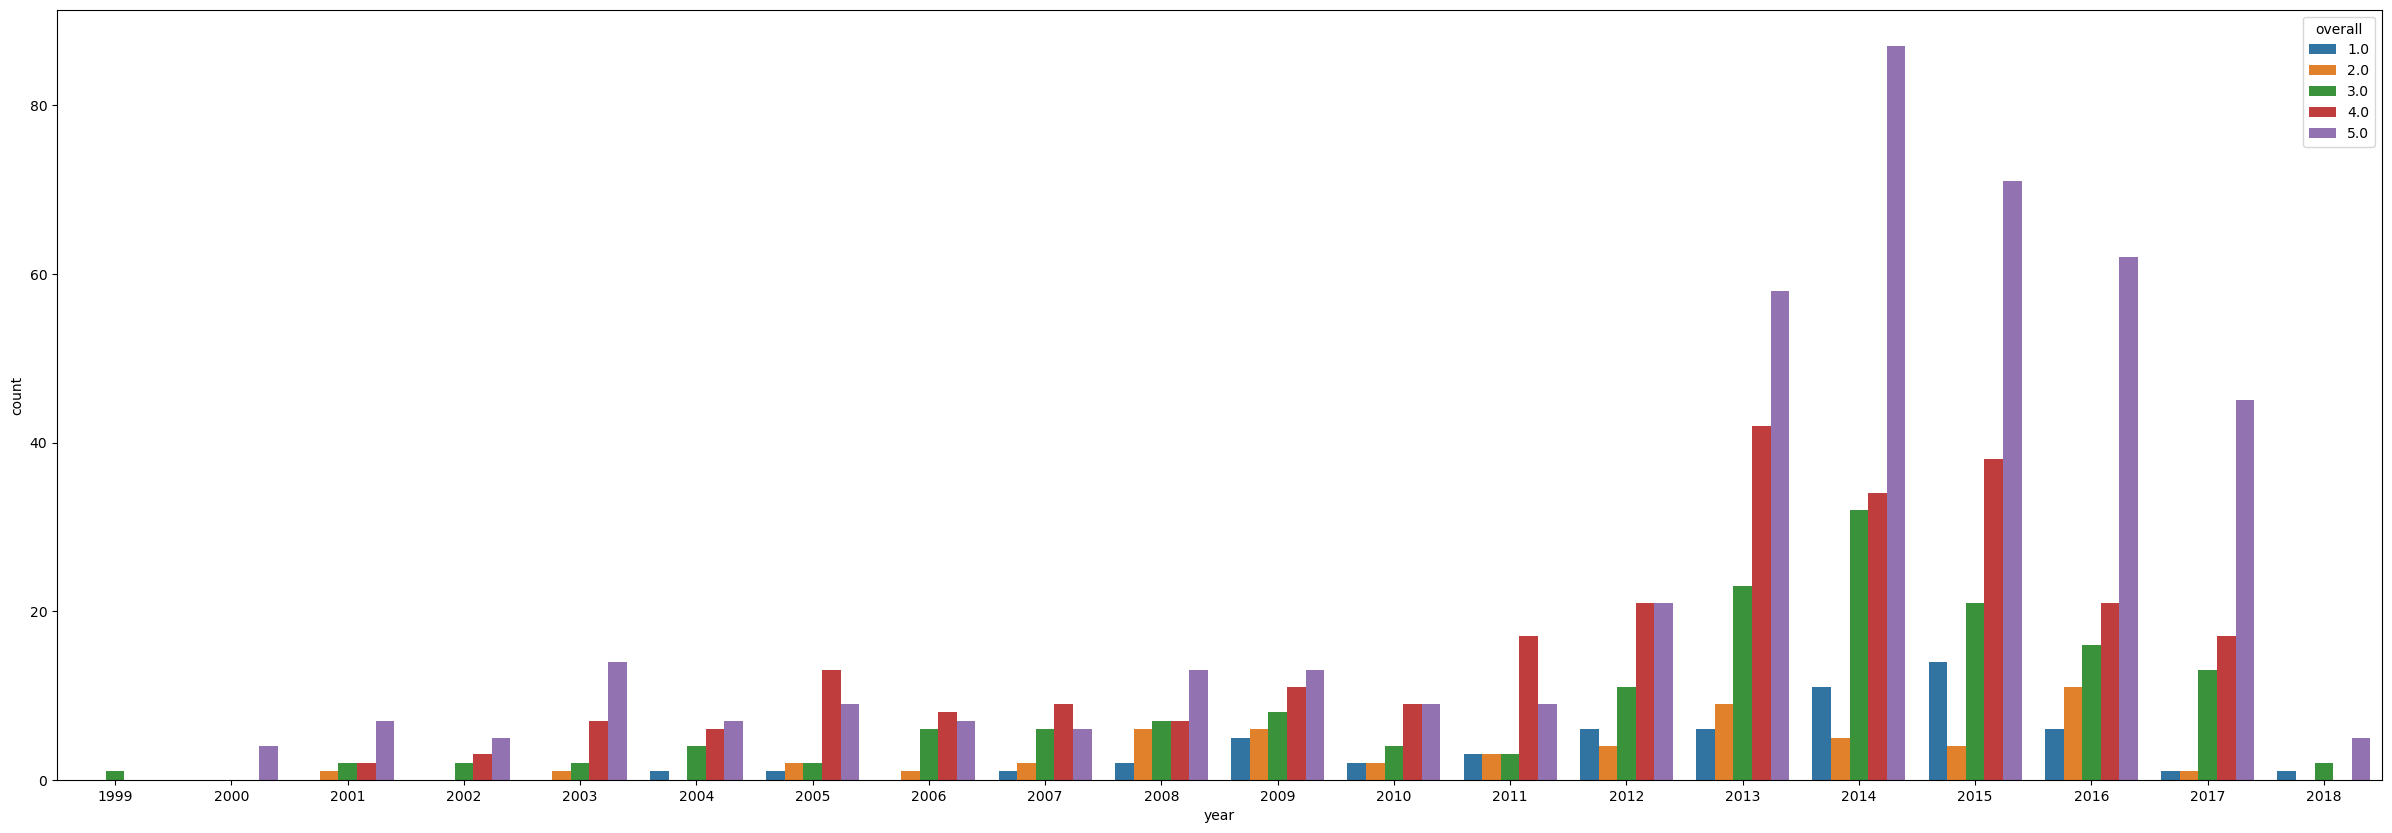

In [30]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='year', hue='overall', data=df)

## Looking to Months

In [35]:
df['month'].value_counts()

3     98
2     94
11    91
10    88
12    85
8     85
7     83
1     79
5     77
9     75
4     75
6     70
Name: month, dtype: int64

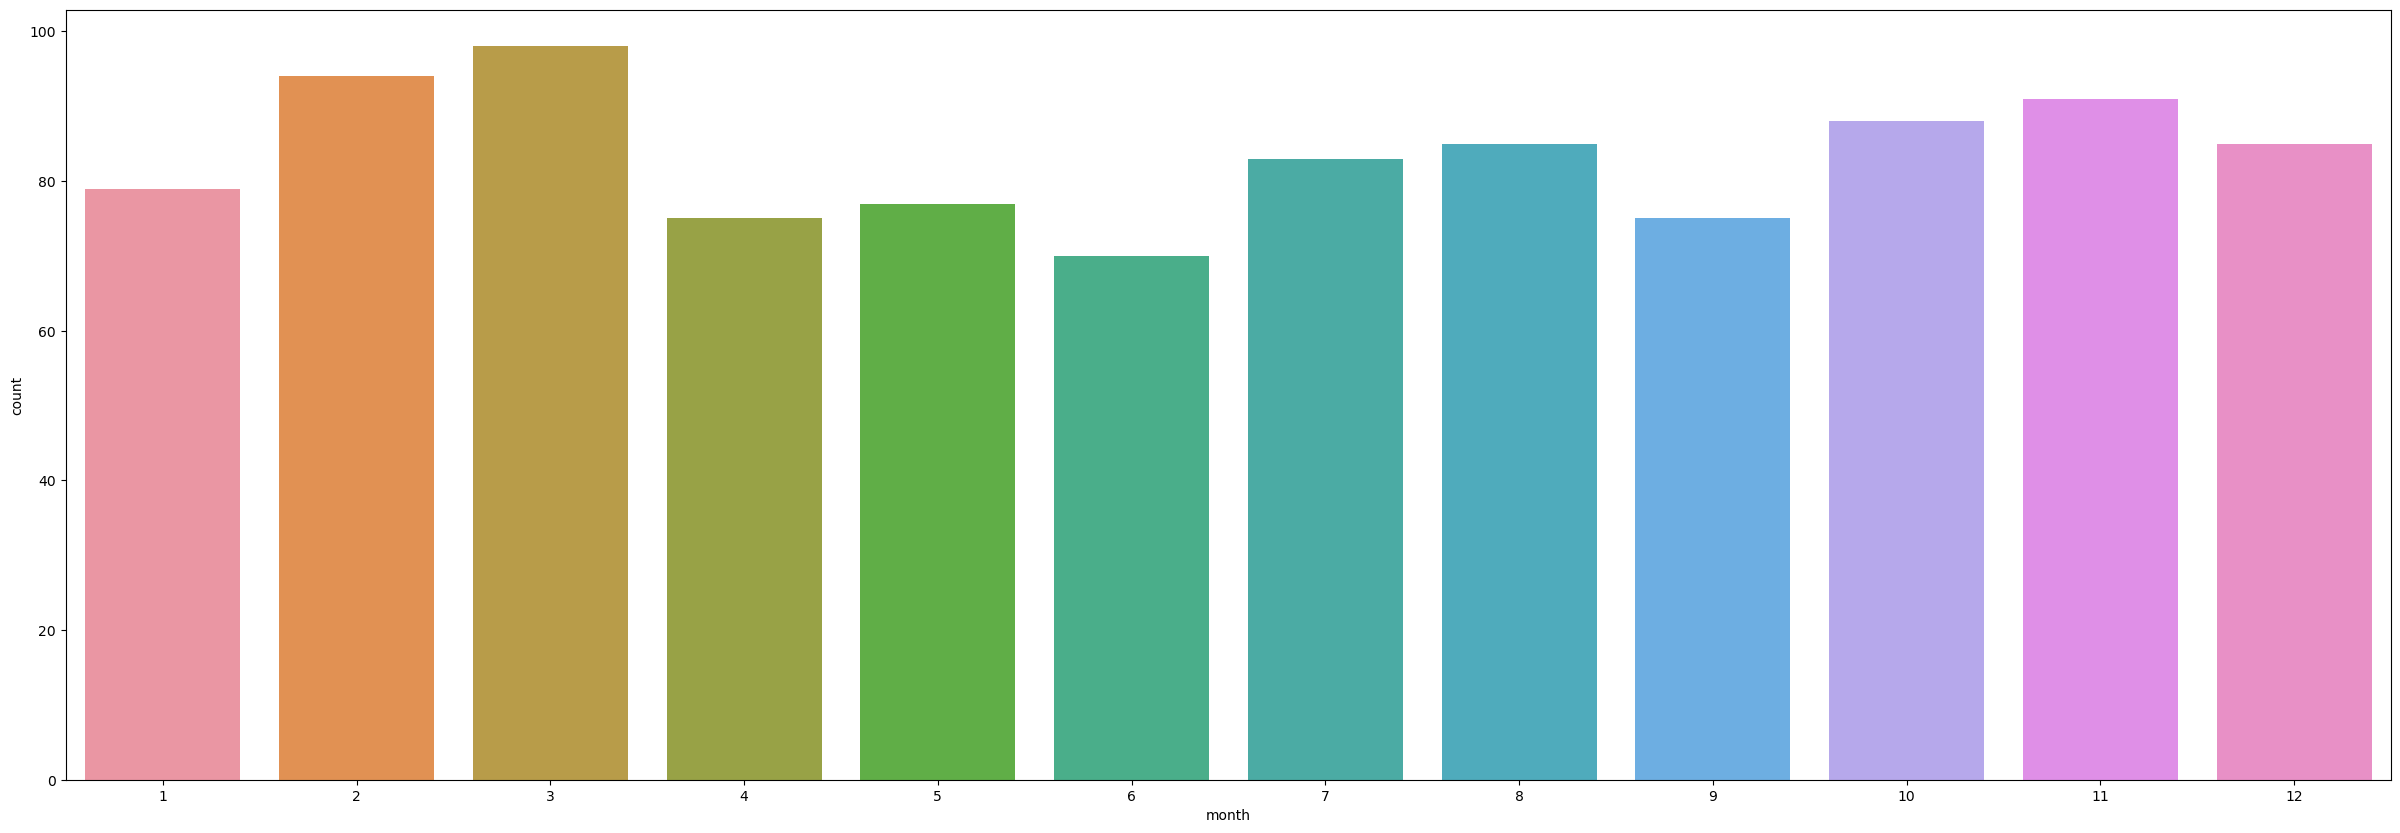

In [36]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='month', data=df)

Mainly, we have similar raring number for each month in our data

In [38]:
# rating average in each month
df.groupby('month')['overall'].mean()

month
1     4.050633
2     4.095745
3     3.887755
4     4.000000
5     4.298701
6     3.814286
7     3.927711
8     3.811765
9     4.066667
10    3.965909
11    3.934066
12    4.058824
Name: overall, dtype: float64

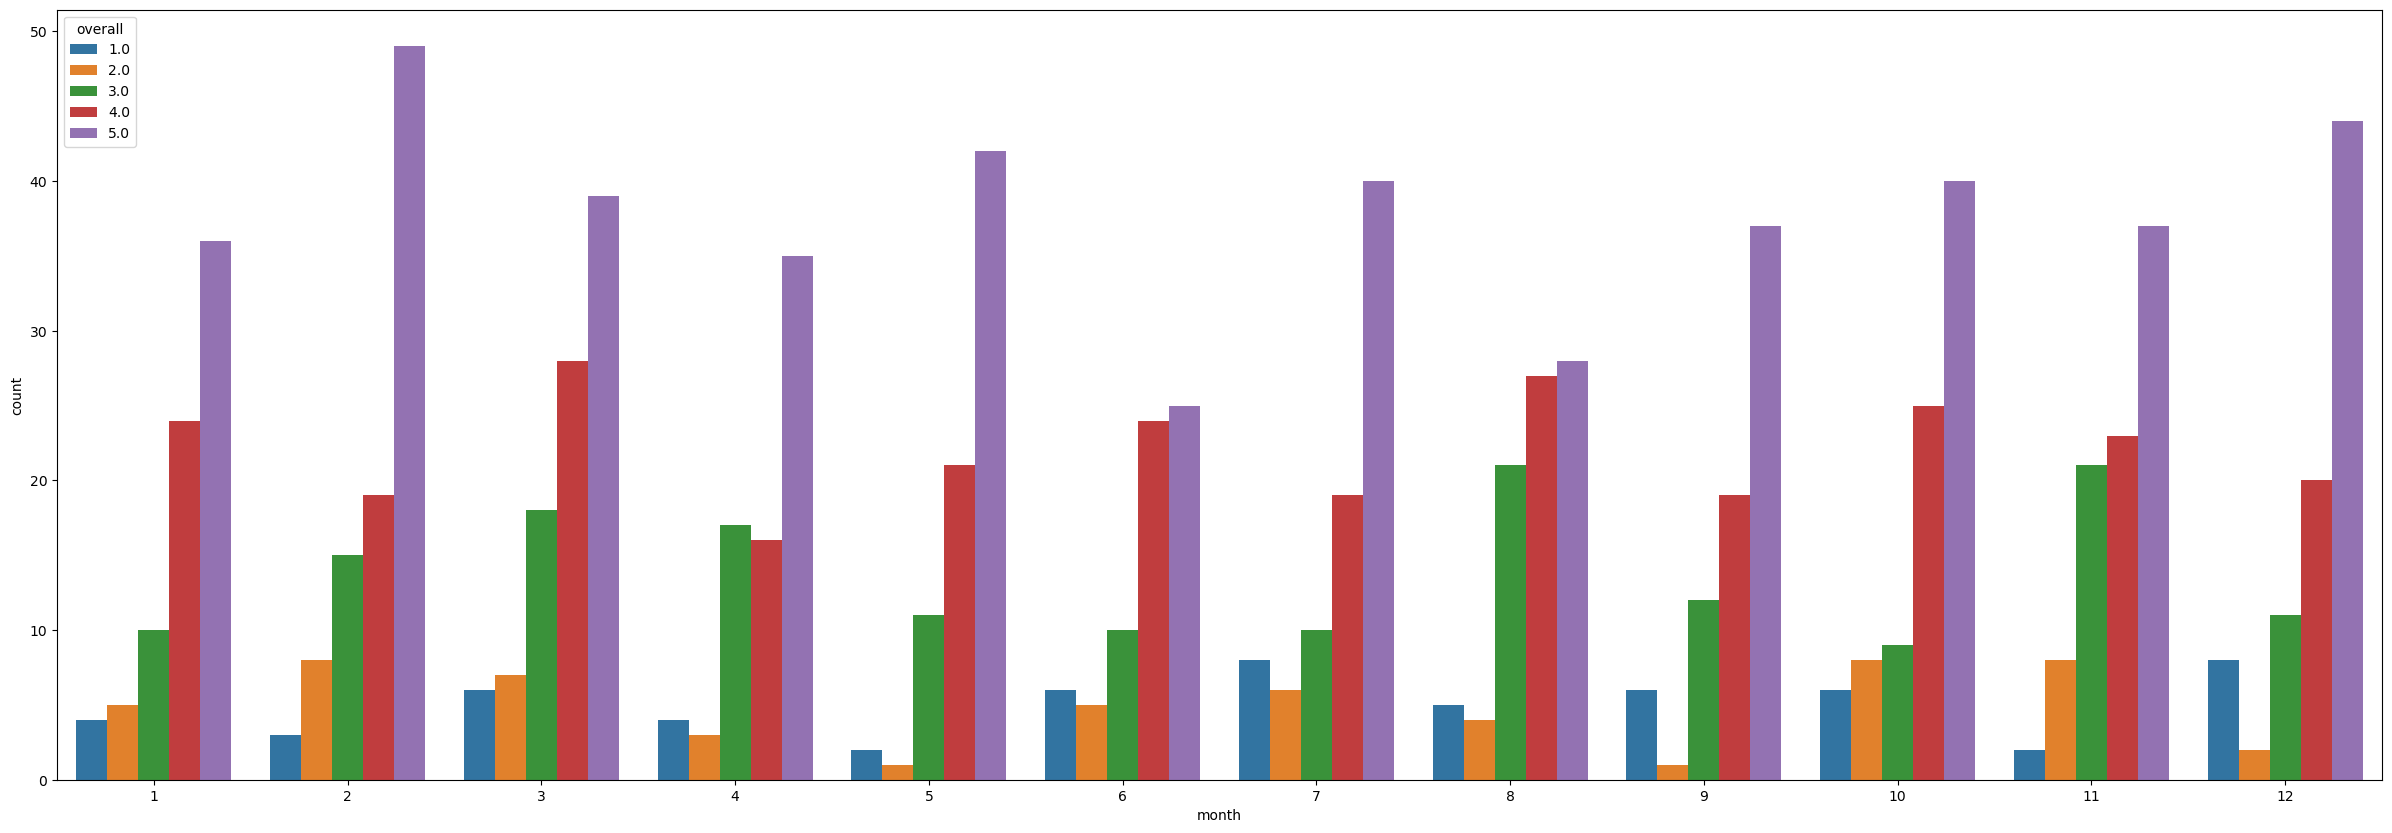

In [39]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='month', hue='overall', data=df)

## Looking to Days

In [43]:
df['day'].value_counts()

15    46
4     46
20    41
3     39
2     39
5     37
21    37
18    36
9     35
19    35
13    34
11    34
26    34
24    34
27    34
16    33
8     33
10    32
14    31
30    30
28    29
12    28
1     28
23    28
25    27
17    26
29    26
22    24
6     24
7     22
31    18
Name: day, dtype: int64

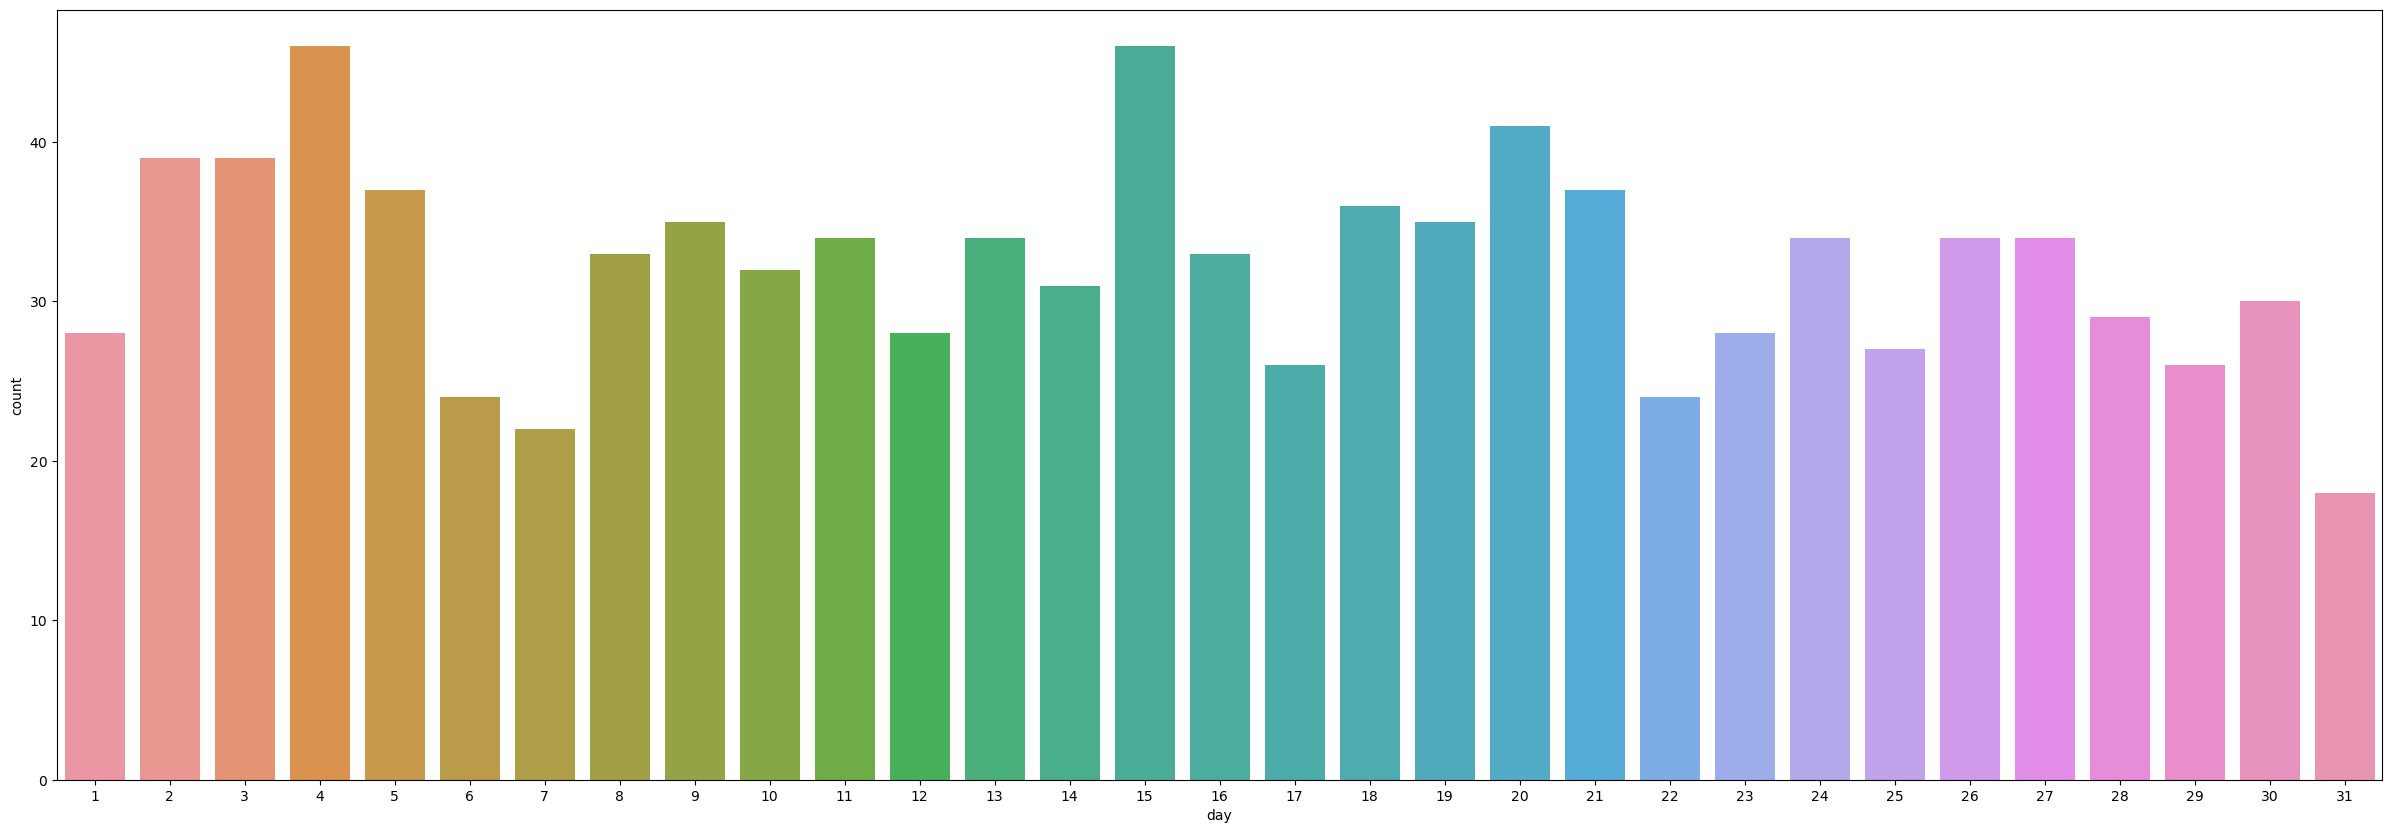

In [40]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day', data=df)

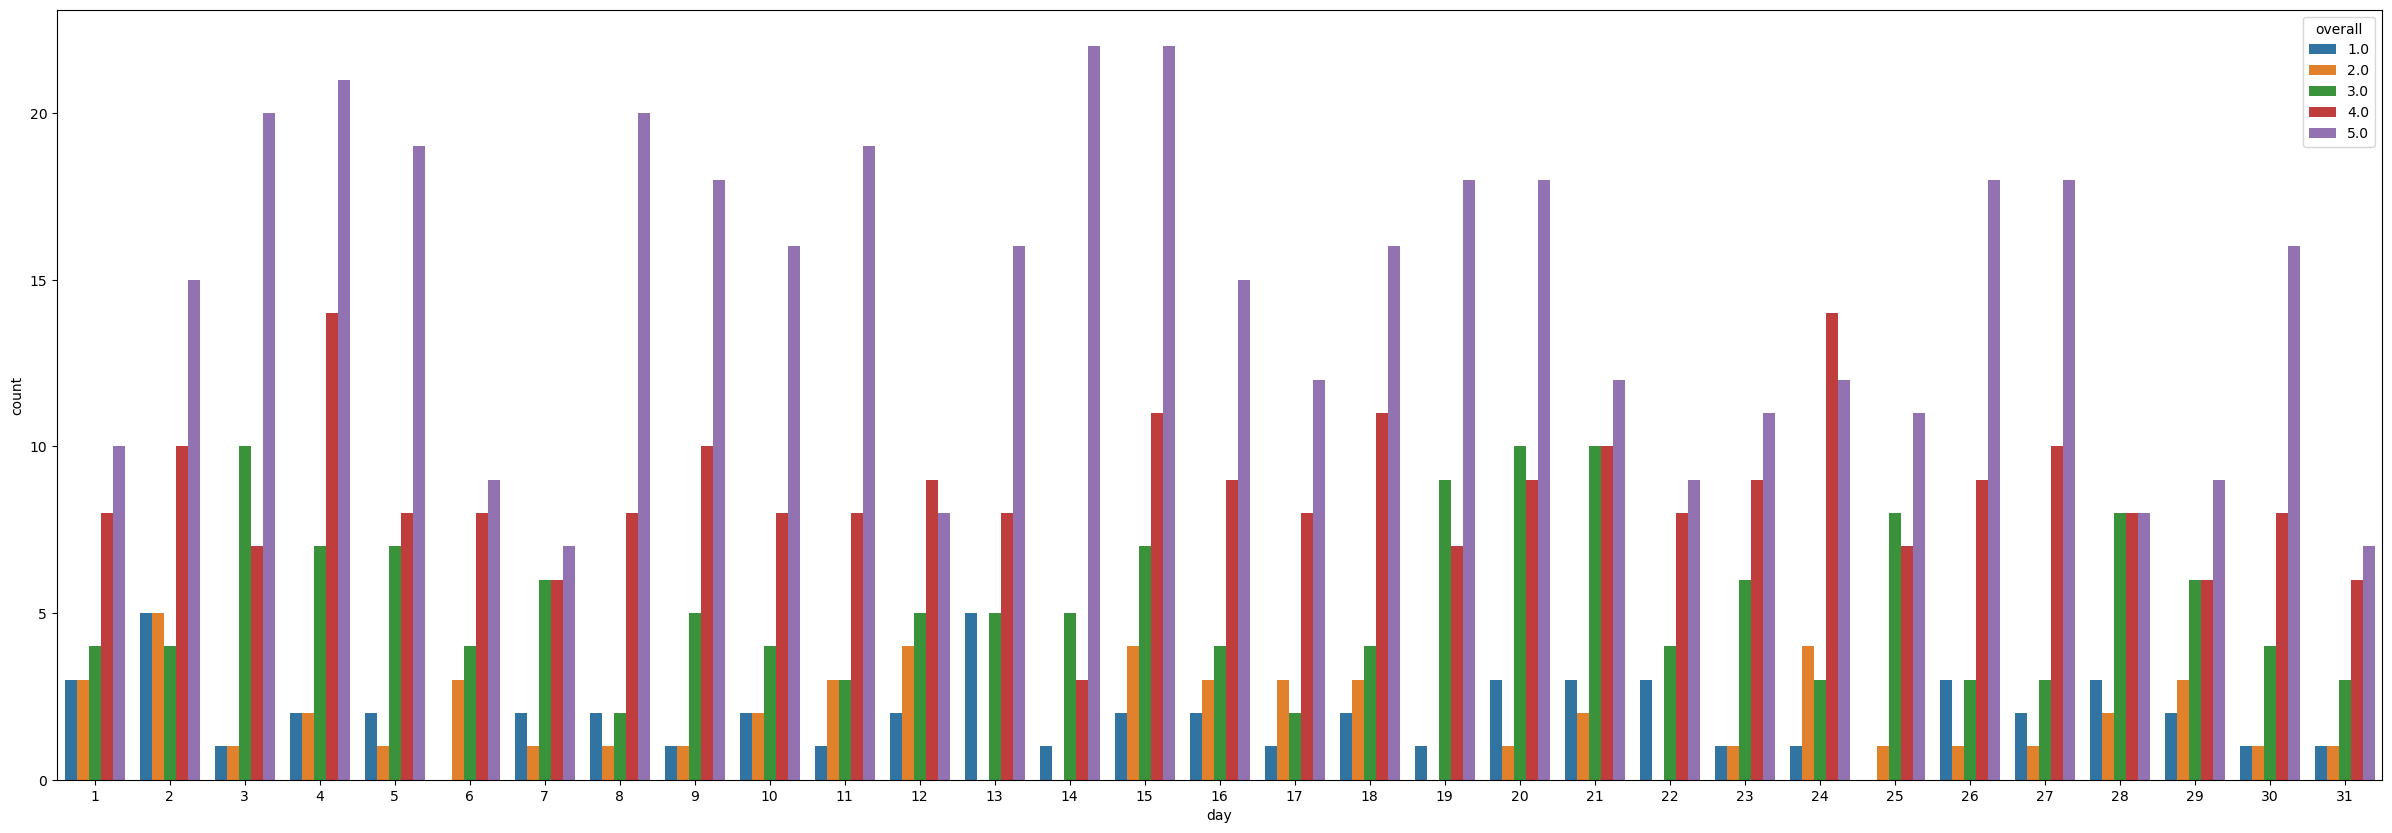

In [42]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day', hue='overall', data=df)

According to plots above, our data distribution is nearly same of each day.
This is a good indicator for realibility for our data.

## Looking to Reviewers

In [44]:
df['reviewerID'].nunique()

849

There are 849 different ID for reviews in this data.

In [46]:
df['reviewerName'].nunique()

767

Normally, reviewer ID must be same reviewer name but name is less than ID.
It means that some people use same names with each other. So, reviewer ID column contains more information than name column. So, I will drop this column.

In [48]:
# dropping reviewerName column
df.drop(columns=['reviewerName'], inplace=True)

## Looking to Reviewers According to Ratings and Rated Books.

In [49]:
df.groupby('reviewerID')['overall'].mean().sort_values(ascending=False).head(100)

reviewerID
AZZP14UZ813US     5.0
A2I9ZAONLN4P6O    5.0
A2DDUXFVUNLR15    5.0
A3OKZLFJFCFQVG    5.0
A2CRUEQ9QIOT70    5.0
                 ... 
A244UVEKGHQ3R9    5.0
A23HXEBAHDWOCL    5.0
A230ZS8F6I0AGM    5.0
A3VXVH4P85N73K    5.0
A43J8JW8I1RFT     5.0
Name: overall, Length: 100, dtype: float64

Top 100 head rating averages are 5. But, it does not give good idea to us.
Because maybe they just rated 5 books as 5. But, there are many user which rated more than 500 books.

In [50]:
df.groupby('reviewerID')['asin'].count().sort_values(ascending=False).head(100)

reviewerID
A2RPIGO3G4M6GN    7
A32NT2ZRGVJVS4    6
A13OGC4WSU6SJ2    5
AA2BITCKPL8JN     5
A2RU3UW2J7S3P5    5
                 ..
A3I8Q1O79PI84D    1
A3I86XIBC9E0I1    1
A3H2CKTFZ3B3GD    1
A3H5MDZAMQV545    1
A3GXR6CHHPX0JS    1
Name: asin, Length: 100, dtype: int64

The 'asin' number show book id and is unique in nature, so we can count books according to 'asin' column.

## Looking to Top 3 User According to Review Number

In [51]:
df.loc[df['reviewerID']=='A2RPIGO3G4M6GN'].groupby('overall')['asin'].count()

overall
3.0    5
4.0    2
Name: asin, dtype: int64

In [54]:
df.loc[df['reviewerID']=='A32NT2ZRGVJVS4'].groupby('overall')['asin'].count()

overall
3.0    6
Name: asin, dtype: int64

In [53]:
df.loc[df['reviewerID']=='A13OGC4WSU6SJ2'].groupby('overall')['asin'].count()

overall
3.0    2
4.0    2
5.0    1
Name: asin, dtype: int64

## Looking to Books

In [55]:
# show number of books in data
df['asin'].nunique()

37

We will look at the books according to number of reviews. Because only rating does not give reliably results such as 5 average rating book with 5 reviews vs. 4.8 average rating book with 1000 reviews.

When we compare our two results, sorting books according to review numbers is shown more reliable than looking to the average of ratings. So, we will analyze and compare mostly reviewed books.  

When I look at the top 10 highest review numbers books, I realized this list is different than book ID's list. When I looked at the details in Amazon.com, I realized that some books have series but as title they were written as same. Also, there are different books with same names. So, finding a title according to Book ID is more reliable way from just looking at titles.

## 'style' Column

In [60]:
df['style'].value_counts()

{'Format:': ' Kindle Edition'}           109
{'Format:': ' Paperback'}                 10
{'Format:': ' Hardcover'}                  4
{'Format:': ' Mass Market Paperback'}      2
Name: style, dtype: int64

In [61]:
df['summary'].nunique()

851

In [62]:
df['summary'][0]

'pretty good story'

In [63]:
df['reviewText'][0]

'pretty good story, a little exaggerated, but I liked it pretty well.  liked the characters, the plot..it had mystery, action, love, all of the main things. I think most western lovers would injoy this book'

Summary column shows the summary of review. To use this column in recommendation part. I will keep this column.

In [64]:
df['vote'].value_counts().head()

2.0    18
3.0    11
4.0     8
5.0     5
7.0     4
Name: vote, dtype: int64

In [66]:
df['image'].value_counts()

['https://images-na.ssl-images-amazon.com/images/I/51arut7GXWL._SY88.gif', 'https://images-na.ssl-images-amazon.com/images/I/51ddKnDrMiL._SY88.gif', 'https://images-na.ssl-images-amazon.com/images/I/51v-jtN2OuL._SY88.gif']    1
Name: image, dtype: int64

## WORD CLOUDS

Word clouds are the easiest way of looking the most popular or characteristic words in the text. To see the difference of words between positive,negative and neutral reviews, I will build three word clouds.  

In [68]:
import numpy as np
# converting from float to integer for creating new columns
df['overall'] = df['overall'].apply(np.int64)

In [70]:
# to see the columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   overall         1000 non-null   int64         
 1   verified        1000 non-null   bool          
 2   reviewTime      1000 non-null   datetime64[ns]
 3   reviewerID      1000 non-null   object        
 4   asin            1000 non-null   object        
 5   style           125 non-null    object        
 6   reviewText      1000 non-null   object        
 7   summary         1000 non-null   object        
 8   unixReviewTime  1000 non-null   int64         
 9   vote            62 non-null     float64       
 10  image           1 non-null      object        
 11  day             1000 non-null   int64         
 12  month           1000 non-null   int64         
 13  year            1000 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), obje

/var/folders/qt/qwdl18ld00132kwks4v4_79m0000gn/T/ipykernel_411/1504893554.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


To classify the positive or negative reviews, I will collect 4 and 5 ratings together as positives and encode them as 2. I will encode rating 3 as 0 and rating 1 and 2 as 1.

In [74]:
def calc_sentiment_with_neutral(overall):
    '''encoding the sentiments of the ratings.'''
    if overall == 5 or overall == 4:
        return 2
    elif overall == 1 or overall==2 : 
        return 0
    else:
        return 1
    
# applying function
df['sentiment'] = df['overall'].apply(calc_sentiment_with_neutral)
df.groupby(['sentiment','overall']).count()

verified  reviewTime  reviewerID  asin  style  reviewText  \
sentiment overall                                                              
0         1              60          60          60    60     13          60   
          2              58          58          58    58      9          58   
1         3             165         165         165   165     20         165   
2         4             265         265         265   265     40         265   
          5             452         452         452   452     43         452   

                   summary  unixReviewTime  vote  image  day  month  year  
sentiment overall                                                          
0         1             60              60     7      0   60     60    60  
          2             58              58    10      0   58     58    58  
1         3            165             165    13      0  165    165   165  
2         4            265             265    15      0  265    265   265  
          5            452             452    17      1  452    452   452

In [75]:
# number of new sentiments
df['sentiment'].value_counts()

2    717
1    165
0    118
Name: sentiment, dtype: int64

## Pre-processing the Reviews

For computers, 'Book' is not same word with 'book'. So, I will do every letter in the text lowercase. And, clean the punctuations from text to make them more accurate for my model.

In [ ]:
# to make all letters lower
df['reviewText']=df['reviewText'].str.lower() 

In [76]:
# check lower
df['reviewText'] 

0      pretty good story, a little exaggerated, but I...
1      If you've read other max brand westerns, you k...
2                           Love Max, always a fun twist
3                          As usual for him, a good book
4      MB is one of the original western writers and ...
                             ...                        
995    I have enjoyed all the Sisterhood books and th...
996    I have read a couple other books in this serie...
997    Fast-paced and well-written. I have some catch...
998                                  Enjoyed re reading.
999    I really enjoyed the series It is well written...
Name: reviewText, Length: 1000, dtype: object

In [77]:
import string
string.punctuation # to see punctuation library of string function

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc

In [79]:
#removing punctions
df['review_clean'] = df['reviewText'].apply(lambda x: remove_punctuation(x))
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote,image,day,month,year,sentiment,review_clean
0,4,True,2014-07-03,A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN,3,7,2014,2,pretty good story a little exaggerated but I l...
1,5,True,2014-05-26,A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN,26,5,2014,2,If youve read other max brand westerns you kno...
2,5,True,2016-09-16,A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN,16,9,2016,2,Love Max always a fun twist
3,5,True,2016-03-03,A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},"As usual for him, a good book",a good,1456963200,NaN,NaN,3,3,2016,2,As usual for him a good book
4,5,True,2015-09-10,AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},MB is one of the original western writers and ...,A Western,1441843200,2.0,NaN,10,9,2015,2,MB is one of the original western writers and ...


When I look at the clean text and original text, I can check the punctuations were removed.

In [80]:
df['review_clean'][3]

'As usual for him a good book'

In [81]:
df['reviewText'][3]

'As usual for him, a good book'

In [ ]:
# positive reviews dataframe
df_pos = df.loc[df['sentiment']==2] 

In [ ]:
# neutral reviews dataframe
df_notr = df.loc[df['sentiment']==1] 

In [ ]:
# negative reviews dataframe
df_neg = df.loc[df['sentiment']==0]

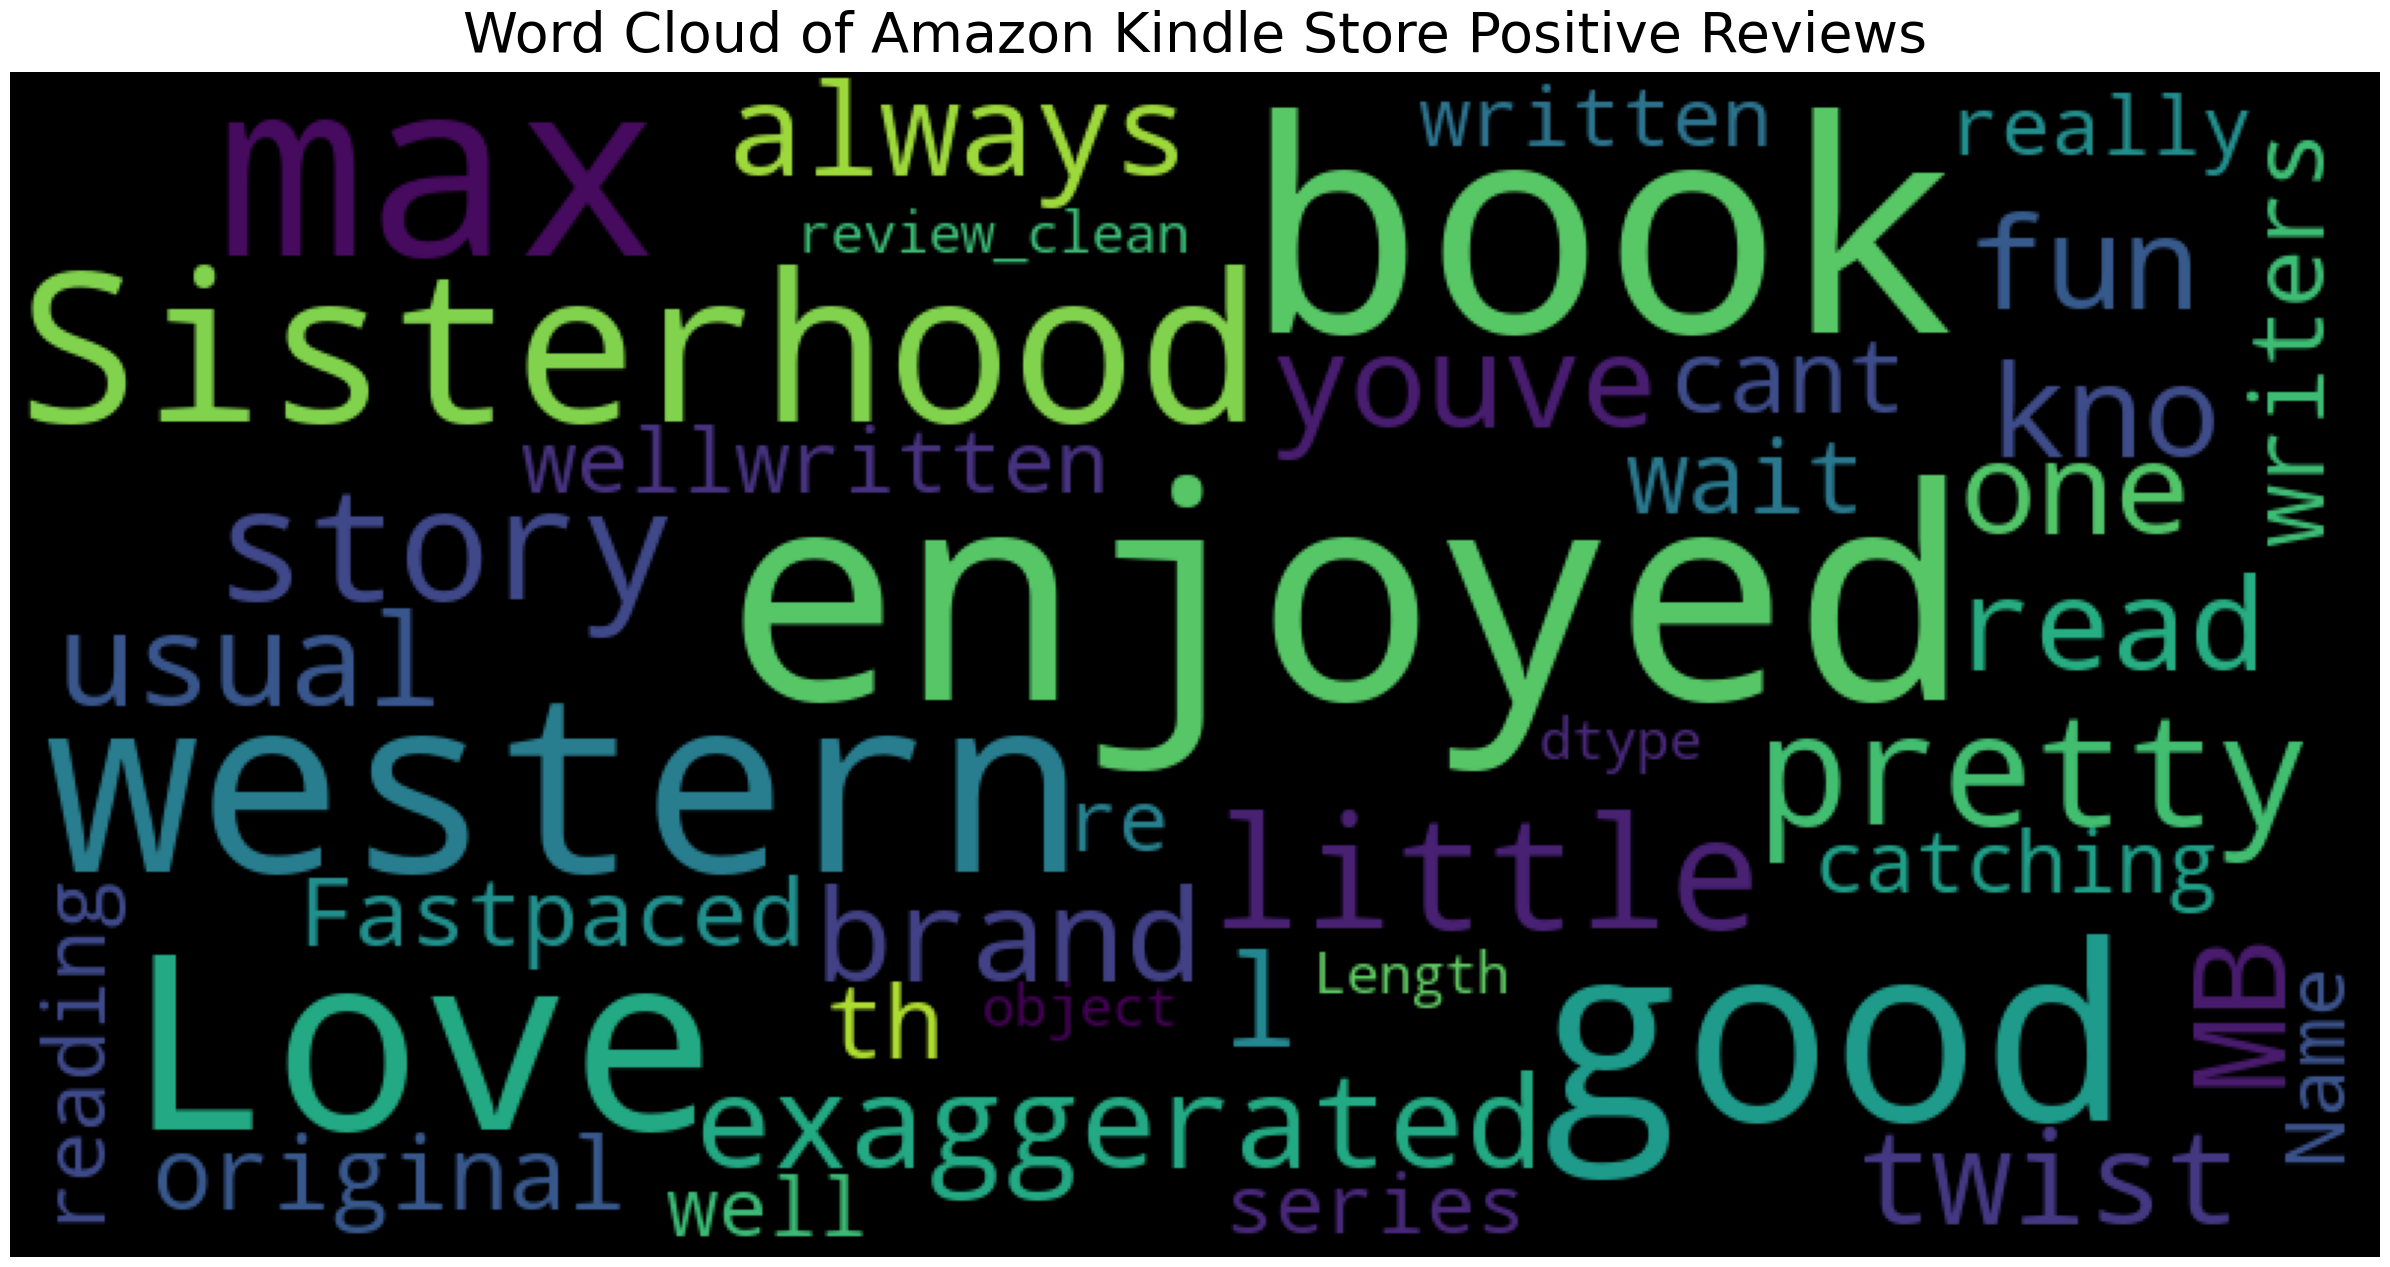

In [88]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# positive reviews dataframe
df_pos = df.loc[df['sentiment']==2] 
stop_words = set(STOPWORDS) # setting stop words

# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words, max_words = 500,
                    max_font_size = 100, random_state = 42, width=800, height=400)

# to see the positive reviews wordcloud
wordcloud.generate(str(df_pos['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

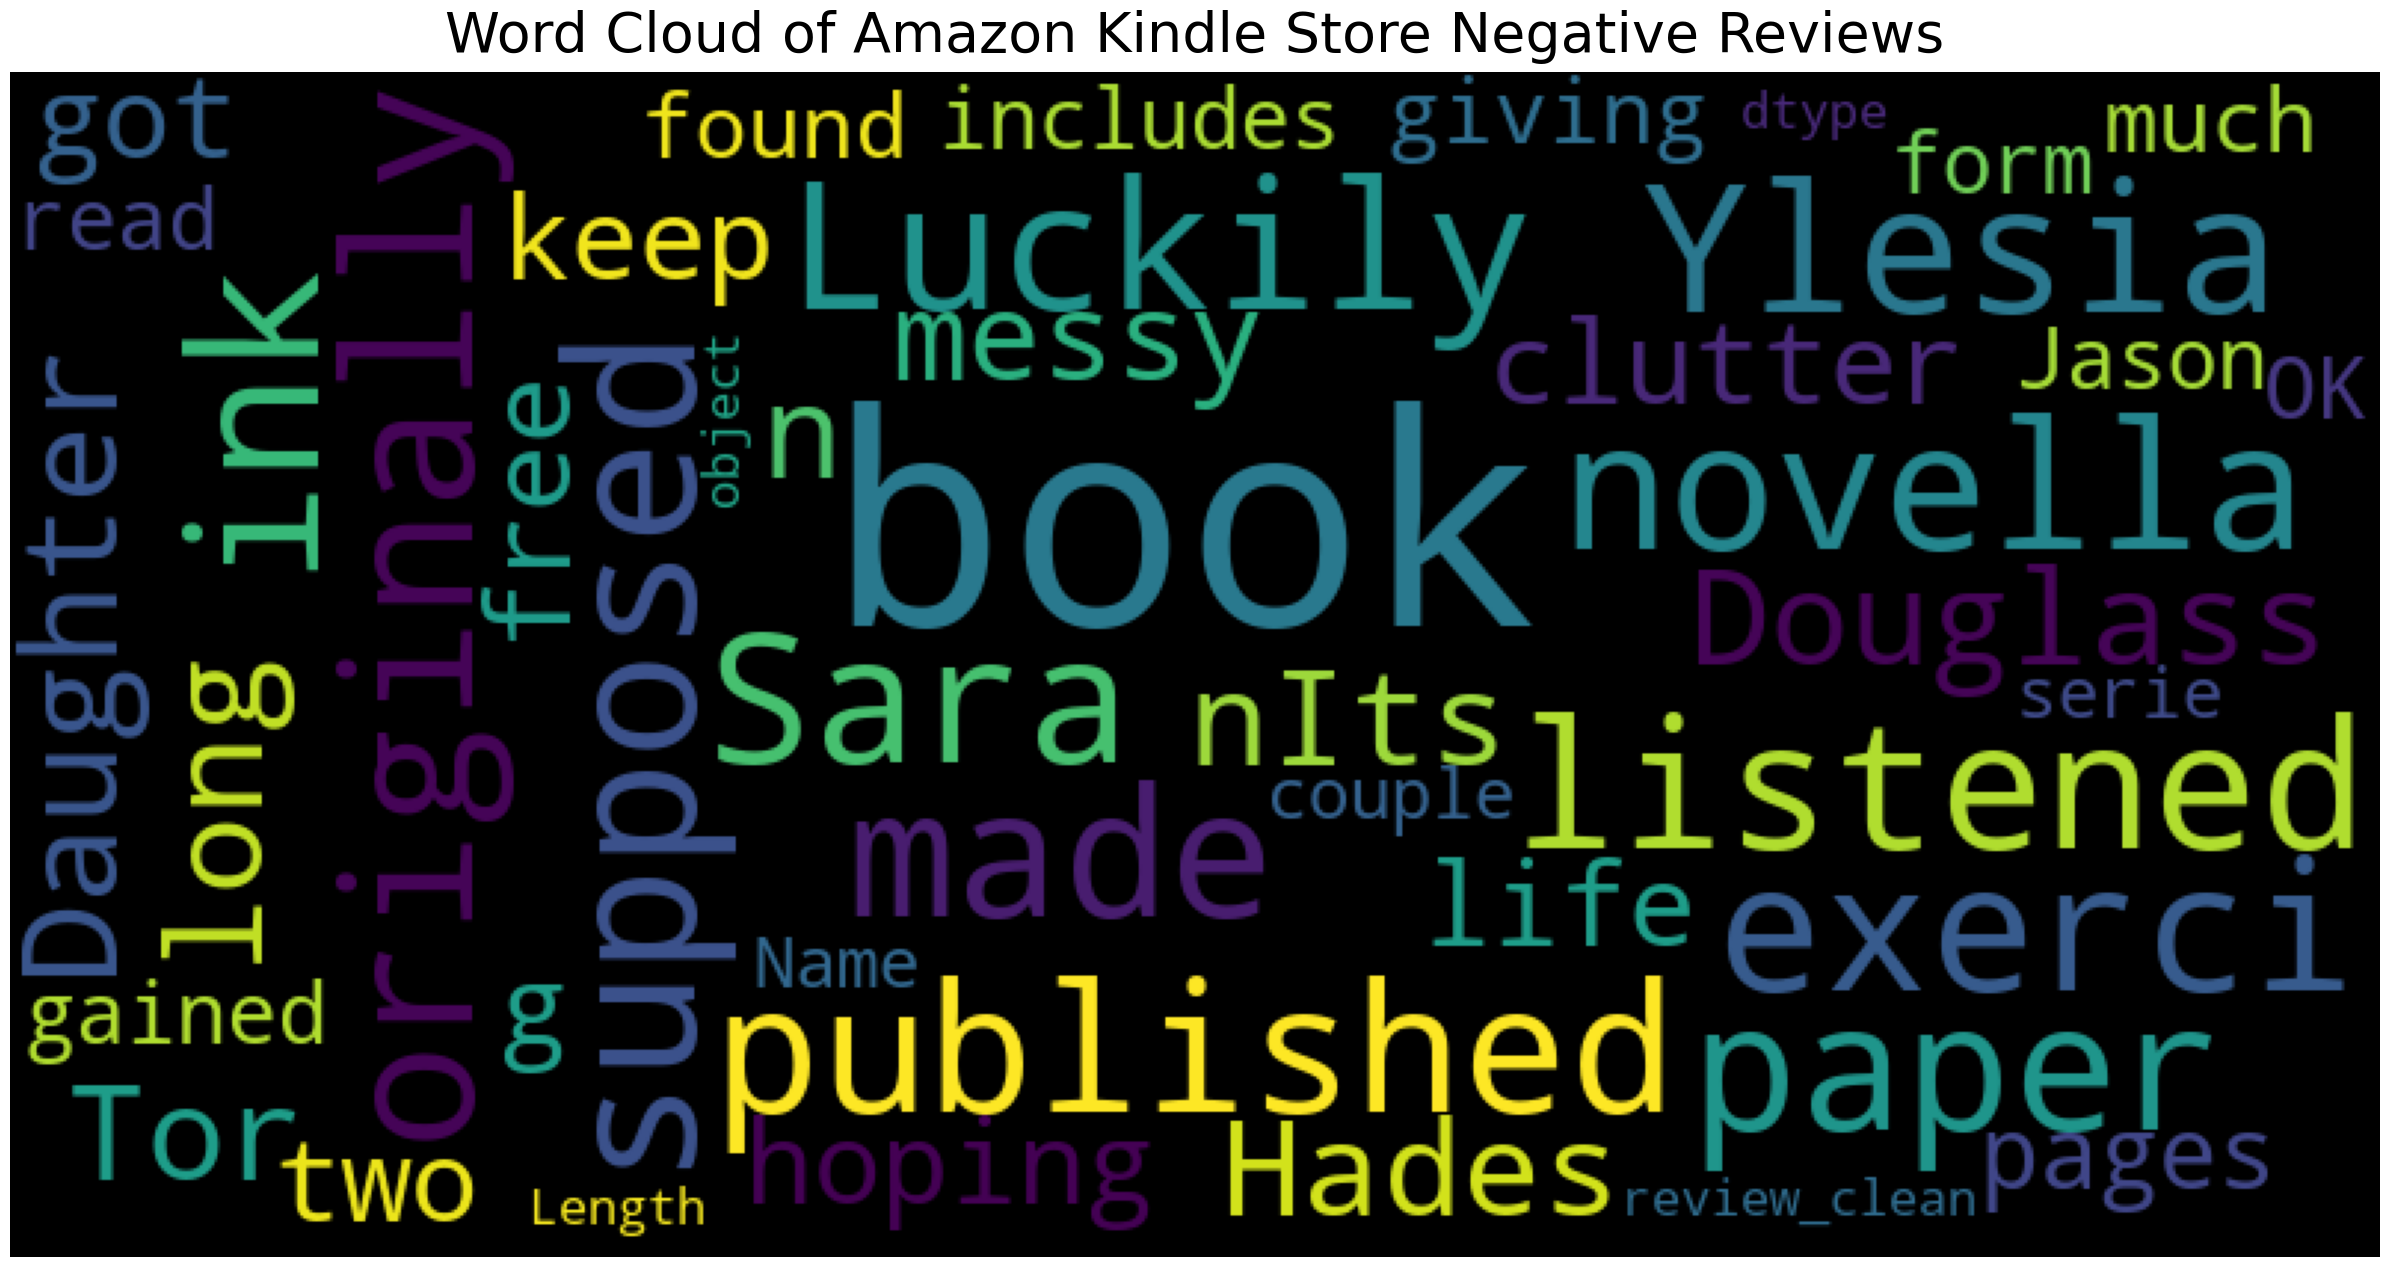

In [90]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# neutral reviews dataframe
df_notr = df.loc[df['sentiment']==1]
stop_words = set(STOPWORDS) # setting stop words

# to see negative wordcloud
wordcloud.generate(str(df_neg['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

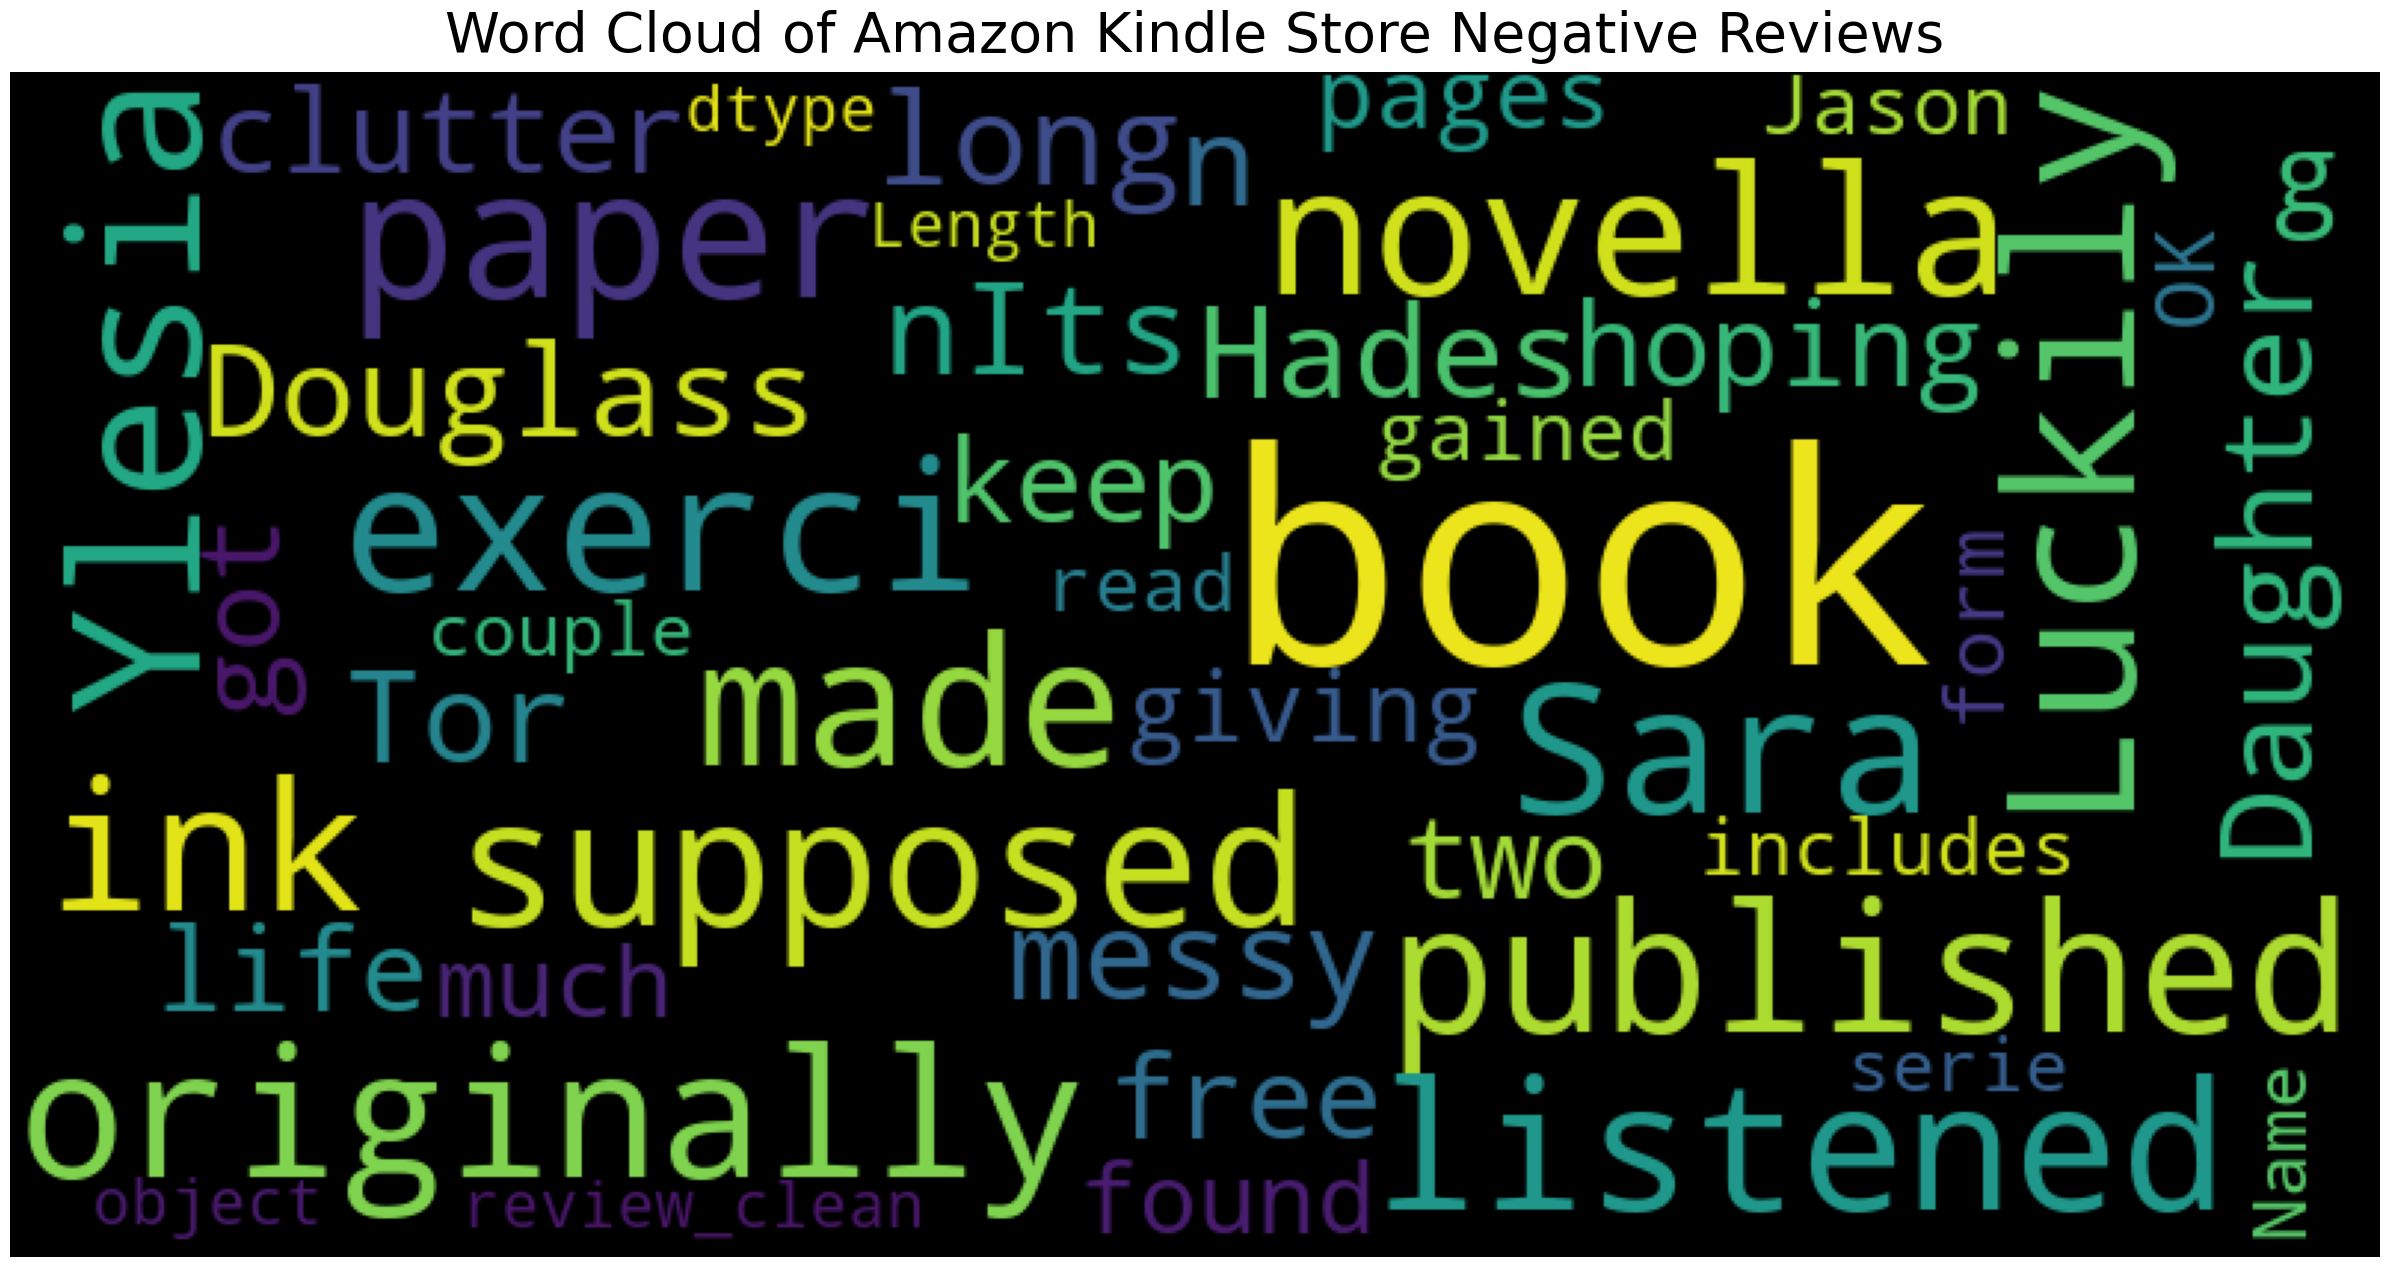

In [89]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# negative reviews dataframe
df_neg = df.loc[df['sentiment']==0]
stop_words = set(STOPWORDS) # setting stop words

# to see negative wordcloud
wordcloud.generate(str(df_neg['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

'Good', 'book', 'love', 'western', 'good' looks bigger it means these are more characteristic words for positive reviews.  

For neutral reviews, 'events', 'book', 'western', 'best' look like more characteristic than others.

'Read', 'time', 'kindle', 'supposed' look characteristic words for negative.

# BUILDING MACHINE LEARNING MODEL

## 1. SIMPLE LogReg Model

My aim in this project to use machine learning and deep learning techniques for classifing the text. But, to look at the 3-class target simple model, I will use simple LogReg.

## Taking Sample and Train-Test Split

My data has more than 2 million rows and it is hard to run each time to find the best model. First problem is my computer's CPU most probably not enough for this. And, second problem is that it takes too much time to run for each model. So, I will use one of the most common techniques in big data and I will take samples from each label class. I will take my sample data balanced from each class, because I want that my model learns more information from also minority class.

In [91]:
df['sentiment'].value_counts()

2    717
1    165
0    118
Name: sentiment, dtype: int64

## Taking 100 Samples from Each Class

In [94]:
df_0 = df.loc[df['sentiment']==0].head(100)
df_1 = df.loc[df['sentiment']==1].head(100)
df_2 = df.loc[df['sentiment']==2].head(100)

frames = [df_0, df_1, df_2]
df_sampled = pd.concat(frames) # getting together samples
df_sampled['sentiment'].value_counts() # Sample Classes

0    100
1    100
2    100
Name: sentiment, dtype: int64

In [107]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


(240,)
(60,)
Accuracy:
TRAIN: 0.9833333333333333
TEST: 0.6666666666666666

Balanced Accuracy:
TRAIN: 0.9838217338217339
TEST: 0.6458333333333334


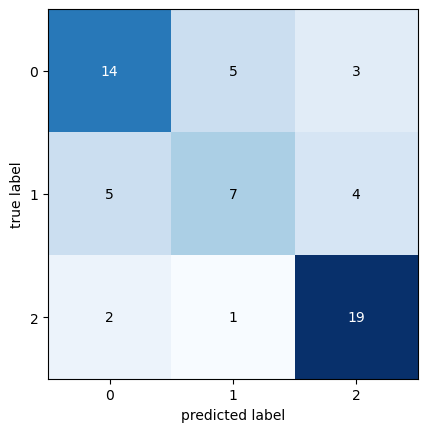

In [108]:
# Simple LogReg Model : Train-Test Split

# sklearn imports for modeling part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix


def model(df) :
    '''This function splits data to train and test, then vectorized reviews 
        and calculating results from LogReg
    '''
    
    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], 
                                                        df['sentiment'], test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
        
    # define vectorize and fit to data     
    word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

    word_vectorizer.fit(df['review_clean'])
    
    # train - test vectorized features
    train_word_features = word_vectorizer.transform(X_train)
    test_word_features = word_vectorizer.transform(X_test)
     
    # choosing and fitting classifier
    classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
    classifier.fit(train_word_features, y_train)
    
    # calculating results 
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
          
    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    

    
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    plt.show()
    
model(df_sampled)

My model is overfit and there is no high accuracy which I want. I can tune this model to handle this but my aim in this project is to determine negative reviews mostly and for doing this I will try also deep learning models. I did LogReg just for first idea. So, I drop this here and continue with binary class machine learning and deep learning models.

In [109]:
import pandas as pd
df.to_csv('Cleaned_Data.csv', index=False)